# Airlines Passenger Satisfiction Analysis using Machine Learning

In [1]:
#Important Library and function imported here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
#importing dataset here
data = pd.read_csv('passenger.csv')

In [4]:
#dataset print from head
data.head()

,Serial,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
#datset print from tail
data.tail()

,Serial,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [6]:
data.shape

(25976, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Serial                             25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [8]:
data.describe()

,Serial,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


## Data Visualization Using Histogram

array([[<AxesSubplot:title={'center':'Serial'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>],
       [<AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>],
       [<AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>],
       [<AxesSubplot:title={'center':'Inflight service'}>,
        

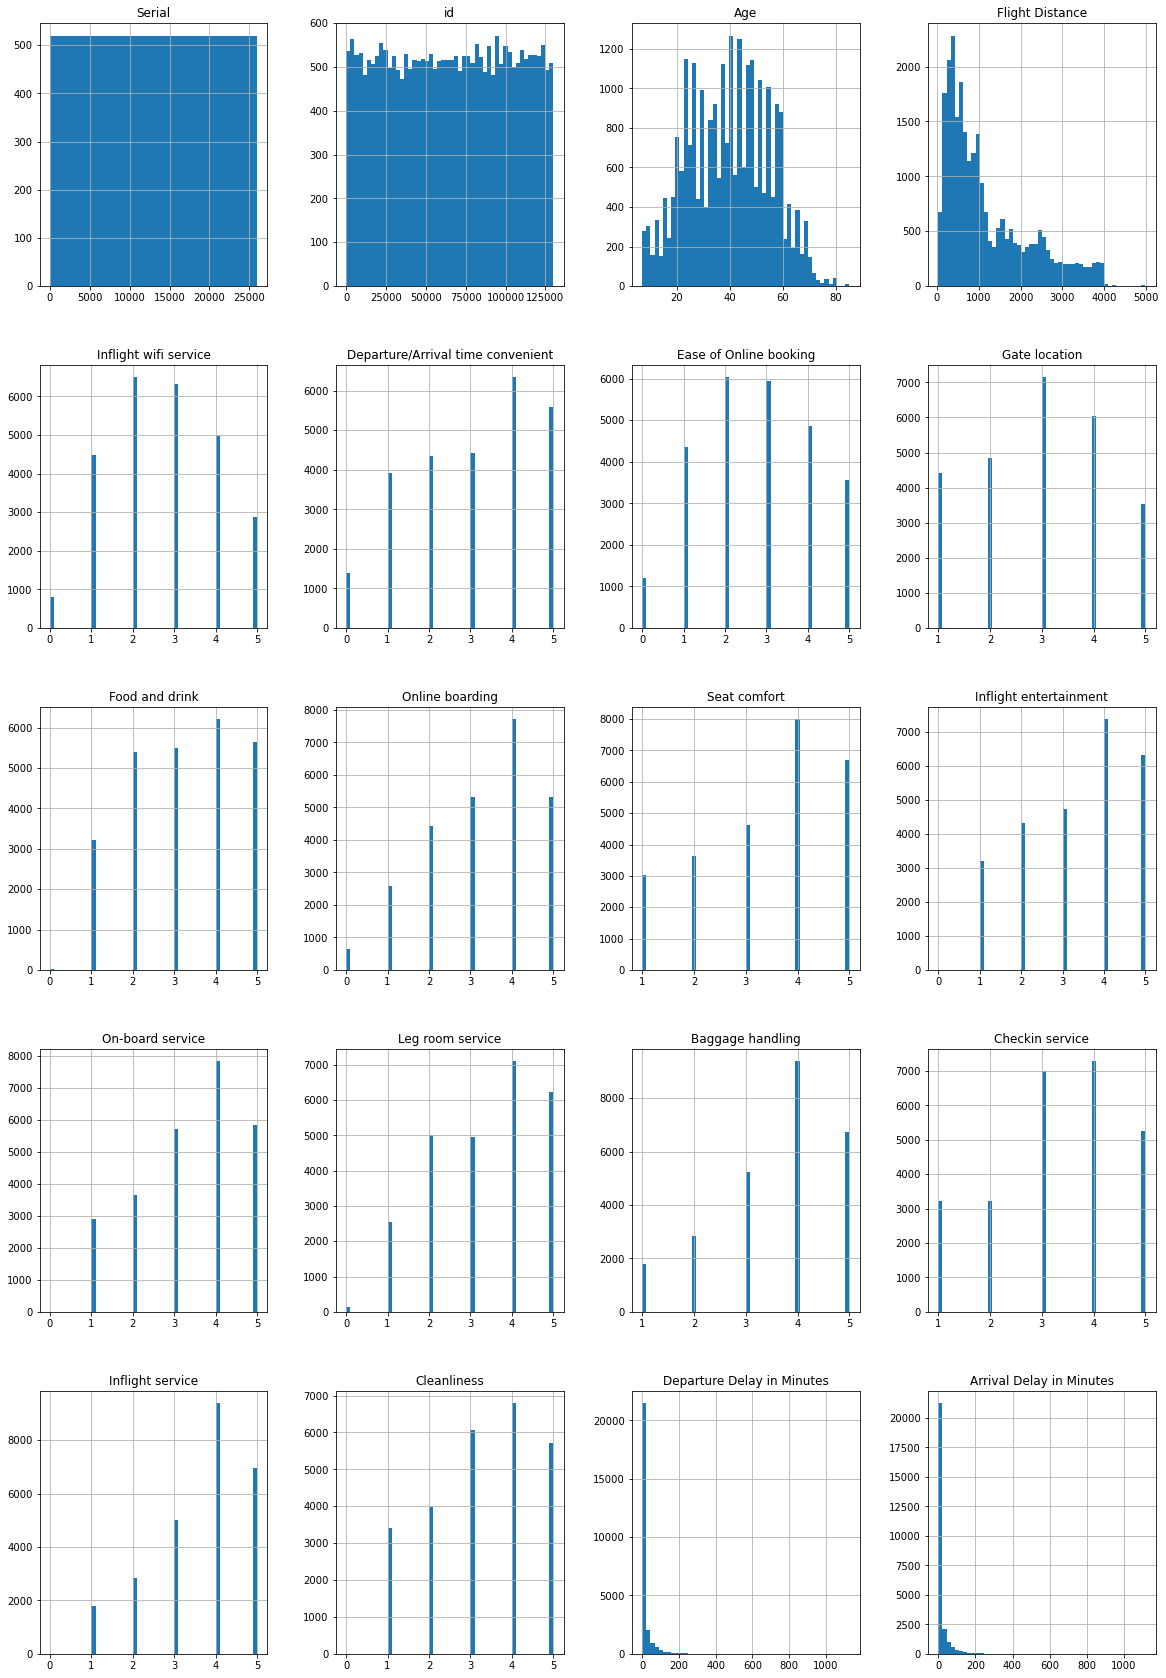

In [9]:
%matplotlib inline
data.hist(bins = 50,figsize=(20,30))

## Label Encoding for Nominal Data in our Dataset

In [10]:
l_encoder = LabelEncoder()
data['Gender']= l_encoder.fit_transform(data['Gender'])
data['Customer Type']= l_encoder.fit_transform(data['Customer Type'])
data['Type of Travel']= l_encoder.fit_transform(data['Type of Travel'])
data['Class']= l_encoder.fit_transform(data['Class'])
data['satisfaction']= l_encoder.fit_transform(data['satisfaction'])

#### After Label Encoding data head print again here

In [11]:
data.head()

,Serial,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0,0,52,0,1,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,0,0,36,0,0,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,1,1,20,0,1,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,1,0,44,0,0,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,0,0,49,0,1,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,1


#### After Label Encoding data tail print again here

In [12]:
data.tail()

,Serial,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,1,1,34,0,0,526,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,25972,71167,1,0,23,0,0,646,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,25973,37675,0,0,17,1,1,828,2,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,25974,90086,1,0,14,0,0,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,1
25975,25975,34799,0,0,42,1,1,264,2,5,...,1,1,2,1,1,1,1,0,0.0,0


#### Plotting Histogram Again

array([[<AxesSubplot:title={'center':'Serial'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>],
       [<AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>],
       [<AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'cente

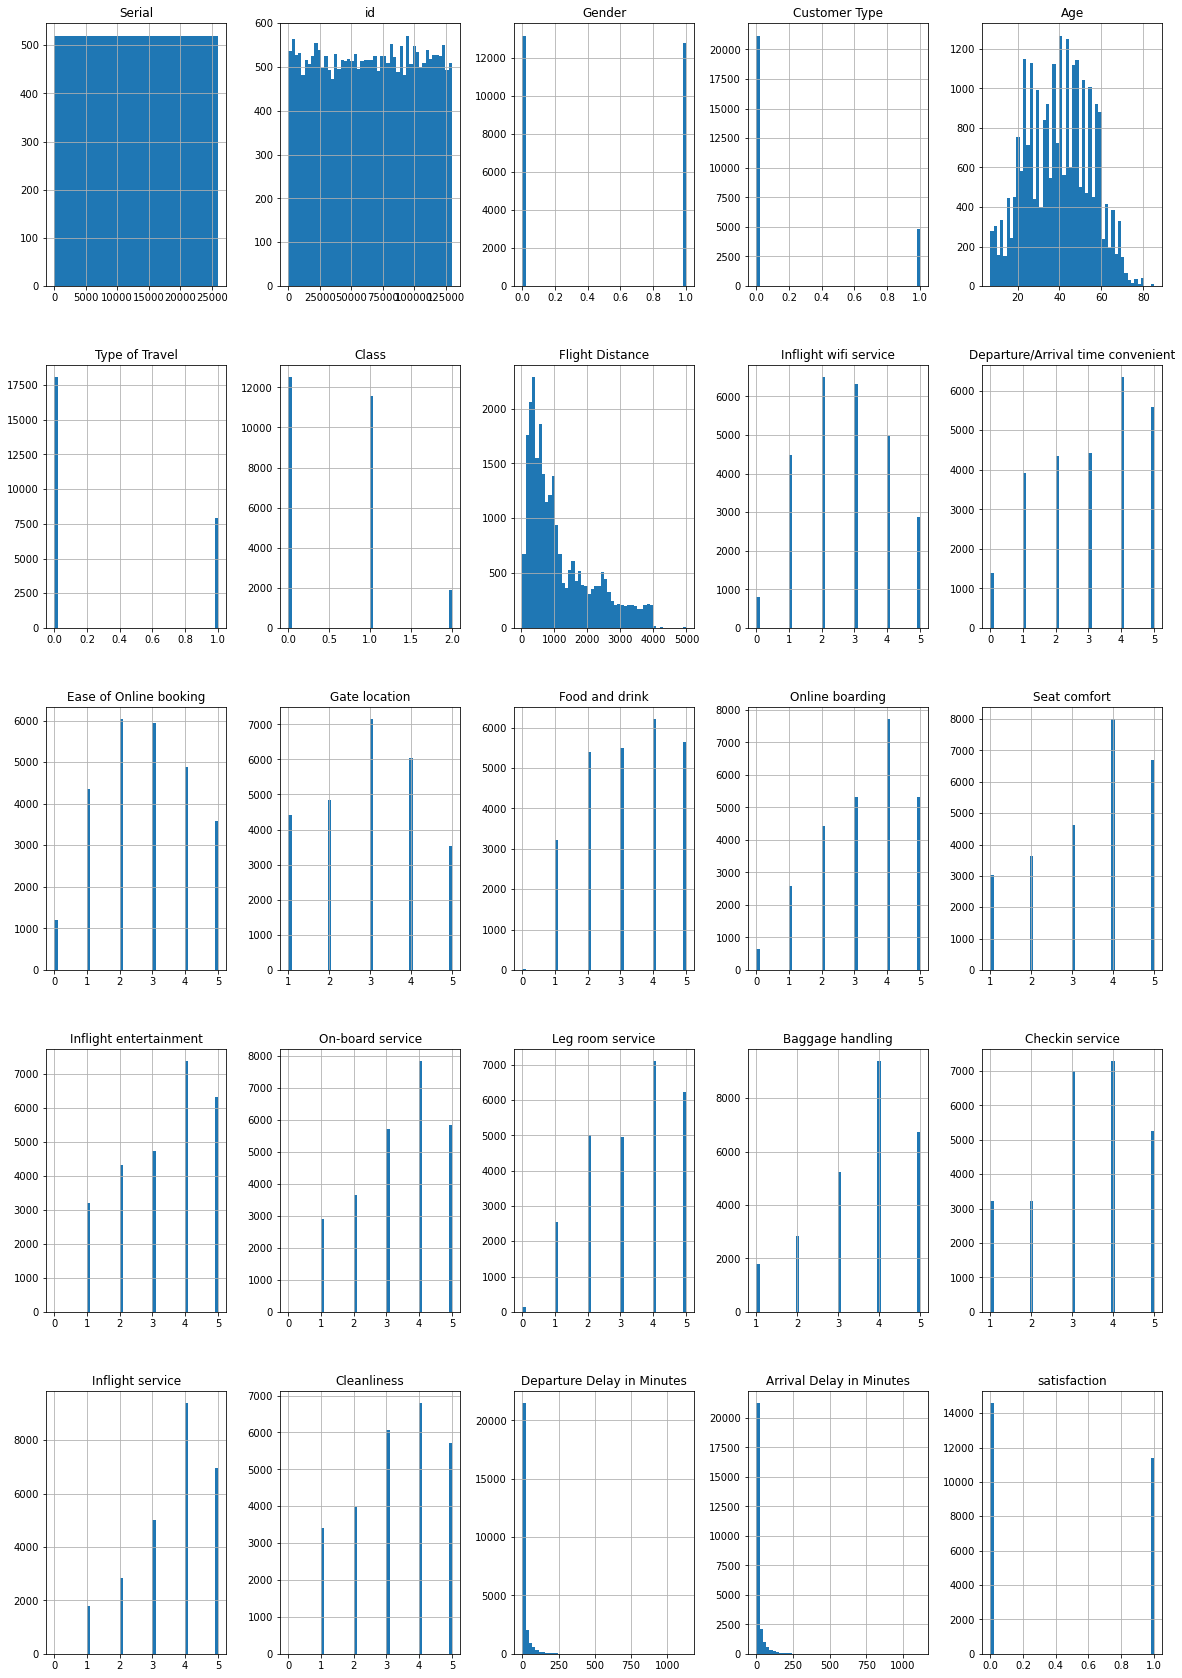

In [13]:
%matplotlib inline
data.hist(bins=50,figsize=(20,30))

## Scatter Ploting Vizualization

<AxesSubplot:xlabel='Flight Distance', ylabel='Food and drink'>

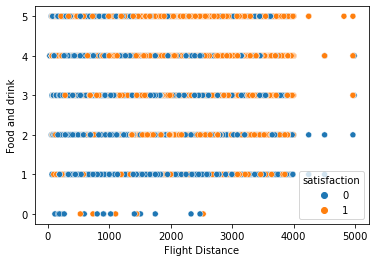

In [14]:
sns.scatterplot(x='Flight Distance',y='Food and drink',hue = 'satisfaction' ,data = data)

## Countplot

H:\Compressed\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

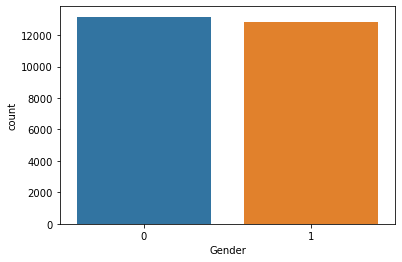

In [15]:
sns.countplot(data['Gender'])

H:\Compressed\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

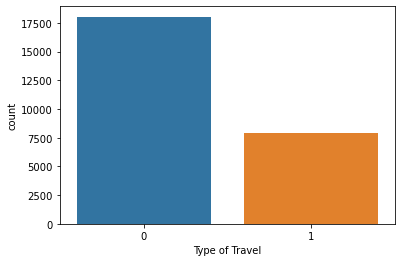

In [16]:
sns.countplot(data['Type of Travel'])

H:\Compressed\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flight Distance', ylabel='count'>

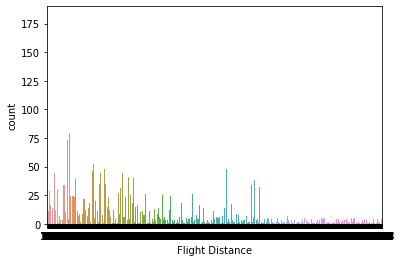

In [17]:
sns.countplot(data['Flight Distance'])

H:\Compressed\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

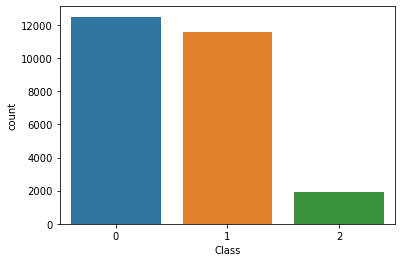

In [18]:
sns.countplot(data['Class'])

H:\Compressed\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

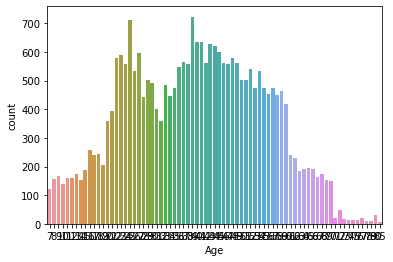

In [19]:
sns.countplot(data['Age'])

H:\Compressed\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

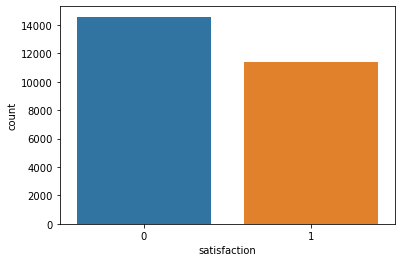

In [20]:
sns.countplot(data['satisfaction'])

##### Note:  Not Making all attribute countplot. But following this command we can make all attribute countplot

## Heat Map Crating

<AxesSubplot:>

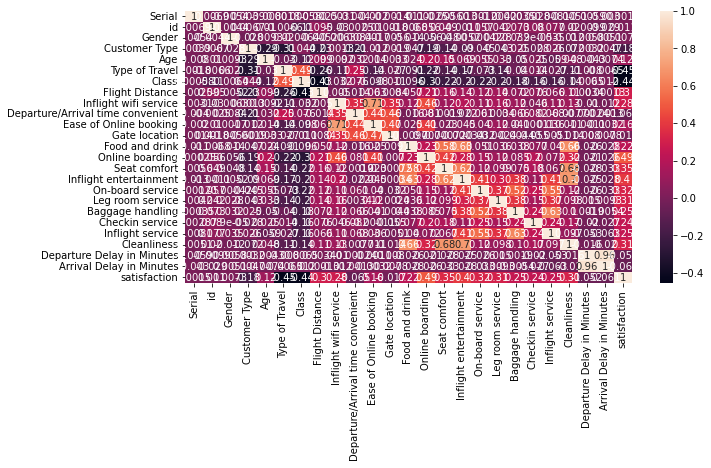

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot =True)

array([[<AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='Customer Type', ylabel='Gender'>,
        <AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Type of Travel', ylabel='Gender'>,
        <AxesSubplot:xlabel='Class', ylabel='Gender'>,
        <AxesSubplot:xlabel='Flight Distance', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Gender', ylabel='Customer Type'>,
        <AxesSubplot:xlabel='Customer Type', ylabel='Customer Type'>,
        <AxesSubplot:xlabel='Age', ylabel='Customer Type'>,
        <AxesSubplot:xlabel='Type of Travel', ylabel='Customer Type'>,
        <AxesSubplot:xlabel='Class', ylabel='Customer Type'>,
        <AxesSubplot:xlabel='Flight Distance', ylabel='Customer Type'>],
       [<AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='Customer Type', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Type of Travel', ylabel='Age'>,
        <AxesSubplot

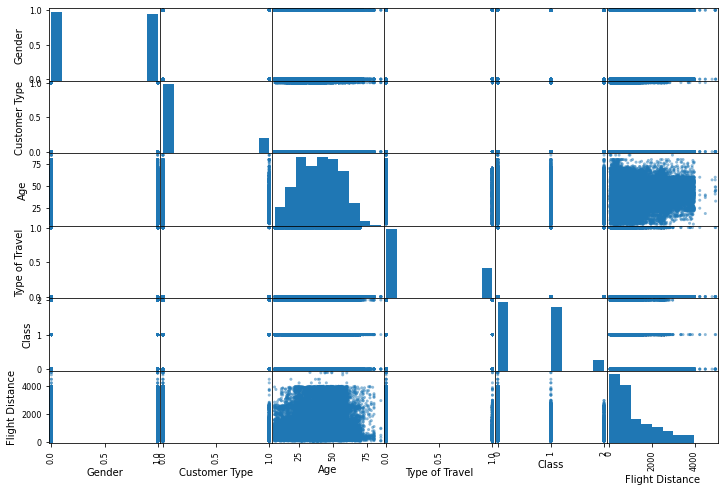

In [22]:
attributes = ["Gender","Customer Type","Age","Type of Travel","Class","Flight Distance"]
scatter_matrix(data[attributes],figsize = (12,8))

## Missing Value Finding and Handeling

In [23]:
#Checking for missing value
data.isnull().sum()

Serial                                0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


#### Note: we have found 83 missing value on Arrival Delay in Minutes. Now we need to handle this missing value by using Mean() replace formula

In [24]:
#Missing value handeling code
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].replace(np.NaN,data['Arrival Delay in Minutes'].mean())

In [25]:
#Checking for Missing Remain or not!
data.isnull().sum()

Serial                               0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

#### Now we have no missing value in our data set

H:\Compressed\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='count'>

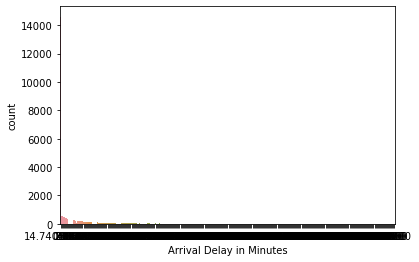

In [26]:
# Count plot creating for those Attribute

sns.countplot(data['Arrival Delay in Minutes'])

## Spliting Dataset

In [27]:
# Spliting Data set in x and y 

x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [28]:
x.head()

,Serial,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,0,0,52,0,1,160,5,4,...,3,5,5,5,5,2,5,5,50,44.0
1,1,90035,0,0,36,0,0,2863,1,1,...,5,4,4,4,4,3,4,5,0,0.0
2,2,12360,1,1,20,0,1,192,2,0,...,2,2,4,1,3,2,2,2,0,0.0
3,3,77959,1,0,44,0,0,3377,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,4,36875,0,0,49,0,1,1182,2,3,...,2,2,2,2,2,4,2,4,0,20.0


In [29]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int32

In [30]:
x

,Serial,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,0,0,52,0,1,160,5,4,...,3,5,5,5,5,2,5,5,50,44.0
1,1,90035,0,0,36,0,0,2863,1,1,...,5,4,4,4,4,3,4,5,0,0.0
2,2,12360,1,1,20,0,1,192,2,0,...,2,2,4,1,3,2,2,2,0,0.0
3,3,77959,1,0,44,0,0,3377,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,4,36875,0,0,49,0,1,1182,2,3,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,1,1,34,0,0,526,3,3,...,4,4,3,2,4,4,5,4,0,0.0
25972,25972,71167,1,0,23,0,0,646,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,25973,37675,0,0,17,1,1,828,2,5,...,2,2,4,3,4,5,4,2,0,0.0
25974,25974,90086,1,0,14,0,0,1127,3,3,...,4,4,3,2,5,4,5,4,0,0.0


In [31]:
y

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int32

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [33]:
x_train

,Serial,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
25666,25666,94725,1,1,27,0,1,458,4,2,...,1,1,1,1,2,2,2,1,35,18.0
920,920,38637,1,0,30,0,0,2611,3,3,...,4,4,5,3,4,3,4,4,11,0.0
8073,8073,22047,0,0,33,1,0,304,1,4,...,3,3,3,1,3,2,3,4,5,0.0
2214,2214,23034,0,0,40,1,1,927,3,3,...,5,5,4,3,1,2,4,5,0,0.0
16129,16129,56265,0,1,27,0,1,404,2,0,...,3,3,2,1,1,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,13123,50666,0,0,61,1,1,109,2,4,...,3,2,2,2,2,2,2,4,0,0.0
19648,19648,99984,0,0,49,1,0,281,3,4,...,4,3,3,3,3,5,3,5,76,80.0
9845,9845,82338,0,0,25,1,0,453,1,4,...,4,4,4,2,4,4,3,4,0,0.0
10799,10799,105909,0,0,51,0,1,283,4,4,...,3,4,4,4,4,4,4,3,36,29.0


In [34]:
x_test

,Serial,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
20508,20508,103781,0,1,29,0,0,882,3,4,...,3,3,3,4,4,4,4,3,10,0.0
18226,18226,19814,0,0,20,0,0,654,3,3,...,3,3,2,1,2,2,3,3,25,28.0
19769,19769,91198,0,0,38,1,1,406,2,4,...,1,5,4,4,5,5,5,5,9,0.0
20149,20149,28644,1,0,39,1,1,2614,5,5,...,2,2,3,3,4,3,4,2,0,0.0
6232,6232,93340,1,0,24,0,0,3328,5,5,...,4,4,4,2,5,5,5,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20484,20484,77169,1,1,26,0,0,1355,4,4,...,1,1,3,5,5,3,4,1,0,0.0
212,212,2717,0,0,38,1,1,562,5,3,...,4,4,1,1,3,4,3,4,0,0.0
23488,23488,49895,1,0,58,0,0,308,3,3,...,4,5,5,5,5,4,5,3,1,4.0
8487,8487,76081,1,0,26,0,1,707,3,1,...,4,3,1,2,3,1,4,3,0,0.0


In [35]:
y_train

25666    0
920      1
8073     0
2214     0
16129    0
        ..
13123    0
19648    0
9845     0
10799    1
2732     0
Name: satisfaction, Length: 18183, dtype: int32

In [36]:
y_test

20508    0
18226    1
19769    0
20149    1
6232     1
        ..
20484    1
212      1
23488    1
8487     0
10491    1
Name: satisfaction, Length: 7793, dtype: int32

### Feature Scaling

In [37]:
#Standard Scaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)

In [38]:
x_train

array([[ 1.68966429,  0.78944846,  1.01658138, ..., -1.72903709,
         0.52790755,  0.07240309],
       [-1.60672593, -0.70142018,  1.01658138, ...,  0.54208054,
        -0.09330787, -0.39061581],
       [-0.65388186, -1.14239706, -0.98368907, ...,  0.54208054,
        -0.24861172, -0.39061581],
       ...,
       [-0.41783549,  0.46019105, -0.98368907, ...,  0.54208054,
        -0.3780316 , -0.39061581],
       [-0.29075409,  1.08672907, -0.98368907, ..., -0.21495867,
         0.55379153,  0.35535909],
       [-1.3653512 ,  1.39674193, -0.98368907, ..., -0.21495867,
        -0.35214763, -0.39061581]])

In [39]:
x_test

array([[ 1.00373228,  1.03282776, -0.99118475, ..., -0.22162597,
        -0.1048513 , -0.40430736],
       [ 0.69861258, -1.20111476, -0.99118475, ..., -0.22162597,
         0.33093866,  0.42178259],
       [ 0.9049227 ,  0.69805697, -0.99118475, ...,  1.29873598,
        -0.13390396, -0.40430736],
       ...,
       [ 1.40217957, -0.40080958,  1.00889365, ..., -0.22162597,
        -0.36632528, -0.28629451],
       [-0.60356128,  0.2958691 ,  1.00889365, ..., -0.22162597,
        -0.39537794, -0.40430736],
       [-0.33561217, -1.5483899 ,  1.00889365, ..., -0.22162597,
        -0.30821995,  0.56929865]])

## Model Fitting 

### Logistic Regression

In [40]:
lr_model = LogisticRegression()

In [41]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [42]:
predict_LR = lr_model.predict(x_test)

In [43]:
predict_LR

array([0, 0, 0, ..., 1, 0, 1])

### Report Analysis for Logistic Regression

In [44]:
print("Logistic Regression Report")
print("---------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_test,predict_LR))

Logistic Regression Report
---------------------------
Confusion Matrix: 
 [[3909  444]
 [ 584 2856]]


In [45]:
print("Accuracy: ",accuracy_score(y_test,predict_LR)*100)

Accuracy:  86.80867445143076


In [46]:
print('Classification Report: \n',classification_report(y_test,predict_LR))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4353
           1       0.87      0.83      0.85      3440

    accuracy                           0.87      7793
   macro avg       0.87      0.86      0.87      7793
weighted avg       0.87      0.87      0.87      7793



##### So after applying Logistic Regression in our Dataset we found accuracy 86.80.

#### Logistic Regression AUC Score Calculation

In [47]:
auc_score = metrics.roc_auc_score(y_test,predict_LR)

In [48]:
auc_score

0.8641169682496433

#### Logistic Regression ROC Score Calculation

In [79]:
fpr1,tpr1,threshold = roc_curve(y_test,predict_LR) 
roc_auc1= auc(fpr1,tpr1)
roc_auc1

0.8641169682496433

#### ROC Curve plotting for Logistic Regression

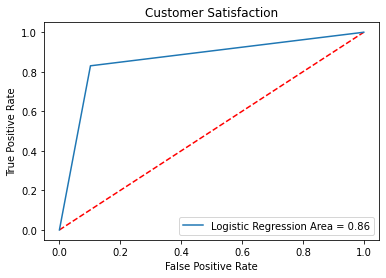

In [80]:
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.plot(fpr1,tpr1, label = 'Logistic Regression Area = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.title('Customer Satisfaction')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Support Vector Machine

In [51]:
sm = SVC(probability=True)

In [52]:
sm.fit(x_train,y_train)

SVC(probability=True)

In [53]:
y_predict_sm = sm.predict(x_test)

In [54]:
y_predict_sm

array([0, 0, 0, ..., 1, 0, 1])

### Report Analysis for SVM

In [55]:
print('Support Vector Machine Report')
print('------------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,y_predict_sm))

Support Vector Machine Report
------------------------------
Confusion Matrix: 
 [[4182  171]
 [ 262 3178]]


In [56]:
print('Accuracy of SVM: ',accuracy_score(y_test,y_predict_sm)*100)

Accuracy of SVM:  94.44373155395867


In [57]:
print('Classification Report: \n',classification_report(y_test,y_predict_sm))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      4353
           1       0.95      0.92      0.94      3440

    accuracy                           0.94      7793
   macro avg       0.94      0.94      0.94      7793
weighted avg       0.94      0.94      0.94      7793



##### Now Applying Support Vector Machine (SVM) model on our Dataset we found 94.44 Accuracy Rate. Which is better then Logistic Regression.

#### SVM AUC Score Calculation

In [58]:
auc_score = metrics.roc_auc_score(y_test,y_predict_sm)

In [59]:
auc_score

0.9422769781866556

#### SVM ROC Score Calculation

In [77]:
fpr2,tpr2,threshold = roc_curve(y_test,y_predict_sm) 
roc_auc2 = auc(fpr1,tpr2)
roc_auc2

0.9109192938310388

#### SVM ROC Curve Ploting


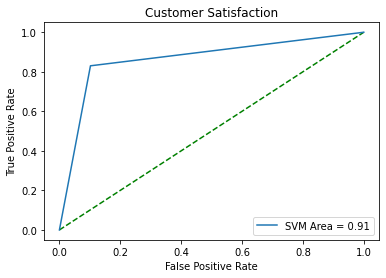

In [78]:
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.plot(fpr1,tpr1, label = 'SVM Area = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.title('Customer Satisfaction')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Decision Tree

In [63]:
dec_tree = DecisionTreeClassifier(random_state = 0)

In [64]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [65]:
dec_tree_predict= dec_tree.predict(x_test)

In [66]:
dec_tree_predict

array([0, 0, 0, ..., 1, 0, 1])

### Report Analysis for Decision Tree

In [67]:
print('Report Analysis for DecisionTreeClassifier:')
print('--------------------------------------------')
print('Confusion Matrics: \n',confusion_matrix(y_test,dec_tree_predict))

Report Analysis for DecisionTreeClassifier:
--------------------------------------------
Confusion Matrics: 
 [[4061  292]
 [ 269 3171]]


In [68]:
print('Accuracy of DecisionTreeClassifier: ',accuracy_score(y_test,dec_tree_predict)*100)

Accuracy of DecisionTreeClassifier:  92.80123187475941


In [69]:
print('Classification Report of DecisionTreeClassifier: \n',classification_report(y_test,dec_tree_predict))

Classification Report of DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      4353
           1       0.92      0.92      0.92      3440

    accuracy                           0.93      7793
   macro avg       0.93      0.93      0.93      7793
weighted avg       0.93      0.93      0.93      7793



#### AUC Score calculation for DecisionTreeClassifier

In [70]:
auc_score = metrics.roc_auc_score(y_test,dec_tree_predict)

In [71]:
auc_score

0.9273610754945799

#### DecisionTreeClassifier ROC Score Calculation

In [75]:
fpr3,tpr3,threshold = roc_curve(y_test,y_predict_sm) 
roc_auc3 = auc(fpr3,tpr3)
roc_auc3

0.9422769781866556

#### DecisionTreeClassifier ROC ploting

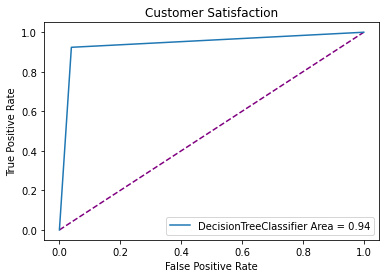

In [76]:
plt.plot([0,1],[0,1],color='purple',linestyle='--')
plt.plot(fpr3,tpr3, label = 'DecisionTreeClassifier Area = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.title('Customer Satisfaction')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

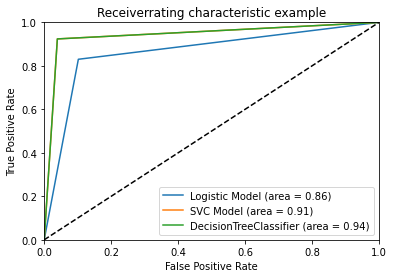

In [82]:
plt.plot(fpr1, tpr1, label='Logistic Model (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='SVC Model (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='DecisionTreeClassifier (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()